In [1]:
import pandas as pd


In [3]:
df = pd.read_csv('https://dados.ufrn.br/dataset/8bf1a468-48ff-4f4d-95ee-b17b7a3a5592/resource/6a8e5461-e748-45c6-aac6-432188d88dde/download/docentes.csv', sep=';')

In [5]:
df.columns

Index(['siape', 'nome', 'sexo', 'formacao', 'tipo_jornada_trabalho', 'vinculo',
       'categoria', 'classe_funcional', 'id_unidade_lotacao', 'lotacao',
       'admissao'],
      dtype='object')

In [13]:
df.dtypes

siape                     int64
nome                     object
sexo                     object
formacao                 object
tipo_jornada_trabalho    object
vinculo                  object
categoria                object
classe_funcional         object
id_unidade_lotacao        int64
lotacao                  object
admissao                 object
dtype: object

In [6]:
df.drop('nome', axis=1, inplace=True) # remove e atualiza o df

In [7]:
df.describe(include='object')


,sexo,formacao,tipo_jornada_trabalho,vinculo,categoria,classe_funcional,lotacao,admissao
count,2771,2771,2771,2771,2771,2771,2771,2771
unique,2,5,3,11,7,17,102,1395
top,M,DOUTORADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe D - Associado ...,ESCOLA AGRÍCOLA DE JUNDIAÍ,2009/01/27 00:00:00.000000000
freq,1498,2192,2171,2404,2214,833,120,81


In [16]:
df.sexo.unique() #equivalente ao distinct no mongodb

array(['F', 'M', 'false'], dtype=object)

In [17]:
print(df['sexo'].where(df['sexo'] == 'false').count()) # duas formas de localizar
print(df[df['sexo']=='false'].value_counts())

1
siape    sexo   formacao   tipo_jornada_trabalho           vinculo           categoria                         classe_funcional                                                                                      id_unidade_lotacao  lotacao                           admissao                     
6347893  false  DOUTORADO  20 horas semanais               Ativo Permanente  PROFESSOR DO MAGISTERIO SUPERIOR  Classe D - Associado                                                                                  52                  DEPARTAMENTO DE ENGENHARIA CIVIL  1983/05/24 00:00:00.000000000    1
dtype: int64


In [18]:
df2 = df.groupby('sexo')
g = df2.ngroups
g

3

1063
1332


<BarContainer object of 2 artists>

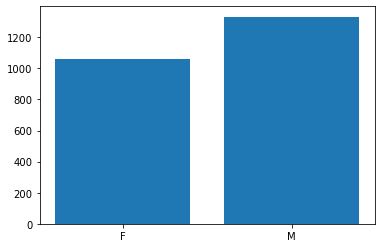

In [19]:
fc = df2.get_group('F').count() #acessa pelo rótulo da coluna
mc = df2.get_group('M').count()
print(fc[0])
print(mc[0])
import matplotlib.pyplot as plt
plt.bar(['F', 'M'], [fc[0], mc[0]])

Gender balance professores@UFRN:

In [20]:
fgb = fc[0]/(fc[0]+mc[0])*100
mgb = mc[0]/(fc[0]+mc[0])*100
print('F: ' + str(fgb) + ' %')
print('M: ' + str(mgb) + ' %')

F: 44.38413361169103 %
M: 55.61586638830897 %


In [21]:
df3 = df.groupby('lotacao')
df3.ngroups

107

In [22]:
df3.get_group('ESCOLA AGRÍCOLA DE JUNDIAÍ').count()

siape                    105
sexo                     105
formacao                 105
tipo_jornada_trabalho    105
vinculo                  105
categoria                105
classe_funcional         105
id_unidade_lotacao       105
lotacao                  105
admissao                 105
dtype: int64

## 1 - Exiba as colunas lotacao e o valor total de docentes em cada lotacao, ordenados do maior para o menor

In [31]:
# por padrão value_counts já retorna a lista de frequências em ordem descendente
n_docentes_lotacao = df['lotacao'].value_counts()
# como a exibição por default é truncada, pode-se controlar o número a exibir
pd.set_option('display.max_rows', 110)
n_docentes_lotacao
# mais opções em https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html

ESCOLA AGRÍCOLA DE JUNDIAÍ                                              105
ESCOLA DE CIÊNCIAS E TECNOLOGIA                                          94
FACULDADE DE CIÊNCIAS DA SAÚDE DO TRAIRI - FACISA                        74
ESCOLA DE MÚSICA                                                         61
ESCOLA MULTICAMPI DE CIÊNCIAS MÉDICAS DO RIO GRANDE DO NORTE             58
INSTITUTO DE QUÍMICA                                                     57
DEPARTAMENTO DE ODONTOLOGIA                                              53
DEPARTAMENTO DE LETRAS                                                   49
INSTITUTO METROPOLE DIGITAL                                              48
DEPARTAMENTO DE ENGENHARIA CIVIL                                         47
NÚCLEO DE EDUCAÇÃO DA INFÂNCIA                                           45
DEPARTAMENTO DE MEDICINA INTEGRADA                                       44
DEPARTAMENTO DE MATEMÁTICA                                               44
DEPARTAMENTO

## 2 - Exiba o gender balance em cada unidade de lotacao

In [24]:
df3.ngroups

107

In [25]:
#df3 = df.groupby('lotacao').agg(lambda x: ','.join(x)) # transforma DataFrameGroupBy em DataFrame
# outra opção é pelo get_group...
#print(df3)

# Lista de índeces, ou seja, de lotações (string)
for index_row in (n_docentes_lotacao.index): 
    filterF = df['sexo'] == 'F'
    df4 = df[df['lotacao']==index_row].where(filterF)
    # celulas que não atendem, where retorna NaN, então vamos excluir estas linhas
    df4.dropna(how='all', inplace=True)
    f = df4.shape[0]
    
    filterM = df['sexo'] == 'M'
    df5 = df[df['lotacao']==index_row].where(filterM)  
    df5.dropna(how='all', inplace=True)
    m = df5.shape[0]
    
    print('Gender balance na Lotação: ' + index_row)
    print('----------------------------------------')
    print(f'F (%): {(f/(f+m))*100:.2f}')
    print(f'M (%): {(m/(f+m))*100:.2f}')
    print('sendo: ' + str(f) + ' professoras e ' + str(m) + ' professores')
    print('----------------------------------------\n')
    
        
    

Gender balance na Lotação: ESCOLA AGRÍCOLA DE JUNDIAÍ
----------------------------------------
F (%): 38.10
M (%): 61.90
sendo: 40 professoras e 65 professores
----------------------------------------

Gender balance na Lotação: ESCOLA DE CIÊNCIAS E TECNOLOGIA
----------------------------------------
F (%): 29.79
M (%): 70.21
sendo: 28 professoras e 66 professores
----------------------------------------

Gender balance na Lotação: FACULDADE DE CIÊNCIAS DA SAÚDE DO TRAIRI - FACISA
----------------------------------------
F (%): 70.27
M (%): 29.73
sendo: 52 professoras e 22 professores
----------------------------------------

Gender balance na Lotação: ESCOLA DE MÚSICA
----------------------------------------
F (%): 26.23
M (%): 73.77
sendo: 16 professoras e 45 professores
----------------------------------------

Gender balance na Lotação: ESCOLA MULTICAMPI DE CIÊNCIAS MÉDICAS DO RIO GRANDE DO NORTE
----------------------------------------
F (%): 51.72
M (%): 48.28
sendo: 30 professor

Gender balance na Lotação: DEPARTAMENTO DE ANÁLISES CLÍNICAS E TOXICOLÓGICAS
----------------------------------------
F (%): 59.09
M (%): 40.91
sendo: 13 professoras e 9 professores
----------------------------------------

Gender balance na Lotação: DEPARTAMENTO DE DIREITO PRIVADO - DIPRI
----------------------------------------
F (%): 36.36
M (%): 63.64
sendo: 8 professoras e 14 professores
----------------------------------------

Gender balance na Lotação: DEPARTAMENTO DE ENGENHARIA ELÉTRICA
----------------------------------------
F (%): 4.55
M (%): 95.45
sendo: 1 professoras e 21 professores
----------------------------------------

Gender balance na Lotação: DEPARTAMENTO DE GEOGRAFIA/CCHLA
----------------------------------------
F (%): 28.57
M (%): 71.43
sendo: 6 professoras e 15 professores
----------------------------------------

Gender balance na Lotação: DEPARTAMENTO DE FILOSOFIA
----------------------------------------
F (%): 23.81
M (%): 76.19
sendo: 5 professoras e 16 p

Gender balance na Lotação: DEPARTAMENTO DE DEMOGRAFIA E CIENCIAS ATUARIAIS
----------------------------------------
F (%): 36.36
M (%): 63.64
sendo: 4 professoras e 7 professores
----------------------------------------

Gender balance na Lotação: DEPARTAMENTO DE DESIGN
----------------------------------------
F (%): 36.36
M (%): 63.64
sendo: 4 professoras e 7 professores
----------------------------------------

Gender balance na Lotação: DEPARTAMENTO DE DIREITO - CERES
----------------------------------------
F (%): 9.09
M (%): 90.91
sendo: 1 professoras e 10 professores
----------------------------------------

Gender balance na Lotação: DEPARTAMENTO DE ENGENHARIA BIOMEDICA
----------------------------------------
F (%): 50.00
M (%): 50.00
sendo: 5 professoras e 5 professores
----------------------------------------

Gender balance na Lotação: DEPARTAMENTO DE INFECTOLOGIA
----------------------------------------
F (%): 60.00
M (%): 40.00
sendo: 6 professoras e 4 professores
--------

In [8]:
df['ano_admissao'] = pd.DatetimeIndex(df['admissao']).year 

In [9]:
df.head()

,siape,sexo,formacao,tipo_jornada_trabalho,vinculo,categoria,classe_funcional,id_unidade_lotacao,lotacao,admissao,ano_admissao
0,1543339,F,MESTRADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DIV ...,1452,NÚCLEO DE EDUCAÇÃO DA INFÂNCIA,2006/07/24 00:00:00.000000000,2006
1,1554468,M,DOUTORADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DV ...,351,ESCOLA AGRÍCOLA DE JUNDIAÍ,2008/09/12 00:00:00.000000000,2008
2,1177821,M,MESTRADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DIV ...,284,ESCOLA DE MÚSICA,1998/04/28 00:00:00.000000000,1998
3,2360824,M,MESTRADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DIII ...,351,ESCOLA AGRÍCOLA DE JUNDIAÍ,2017/01/25 00:00:00.000000000,2017
4,2364334,F,DOUTORADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DIV ...,351,ESCOLA AGRÍCOLA DE JUNDIAÍ,2009/10/13 00:00:00.000000000,2009


In [10]:
label_categ = ['pre_internet', 'inicio_internet', 'redes_sociais', 'datascience']

In [11]:
df.describe()

,siape,id_unidade_lotacao,ano_admissao
count,2.771000e+03,2771.000000,2771.000000
mean,2.096628e+06,2713.866474,2010.097438
std,1.149837e+06,5460.710276,10.432933
min,1.274600e+04,3.000000,1972.000000
25%,1.289832e+06,141.000000,2007.500000
50%,1.804830e+06,201.000000,2011.000000
75%,2.675584e+06,4890.000000,2018.000000
max,9.350807e+06,31231.000000,2022.000000


In [12]:
intervalos = [1972, 1990, 2000, 2010, 2022]

In [13]:
classes = pd.cut(df['ano_admissao'], intervalos, labels=label_categ)

In [15]:
pd.value_counts(classes)

datascience        1448
redes_sociais       876
inicio_internet     297
pre_internet        149
Name: ano_admissao, dtype: int64

In [19]:
docente_plot = {'categorias': ['datascience', 'redes_sociais', 'inicio_internet', 'pre_internet'], 'qtd': [1448, 876, 297, 149]}
df_plot = pd.DataFrame(data=docente_plot)

<AxesSubplot:xlabel='categorias', ylabel='qtd'>

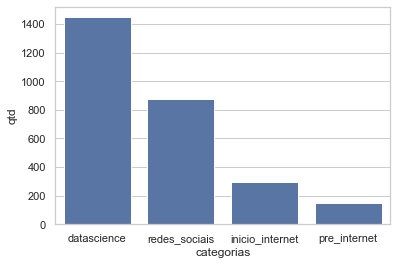

In [22]:
import seaborn as sb
sb.set_theme(style="whitegrid")

sb.barplot(x="categorias", y="qtd", data=df_plot, color="b")

In [23]:
df_group_years = df.groupby('ano_admissao')

In [25]:
df_group_years.ngroups

47

In [37]:
n_docentes_ano = df['ano_admissao'].value_counts()
ano = n_docentes_ano.index
qtd = n_docentes_ano

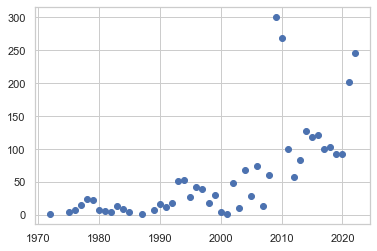

In [40]:
import matplotlib.pyplot as plt
plt.plot(ano, qtd, 'bo')